# Multiclass Classification of sentences using XGboost(XGB) and Stochastic Gradient descent(SGD)

In this notebook you have a complete pipeline of classification using some classifiers as well as parameter tuning  and complete evaluation of the classfiers as following:

- 1) Training and Prediction by SGDClassifier
- 2) Training and Prediction by XGboost
- Parameter Tuning
- Evaluation (train-test_split, 10 fold cross valdiation,confusion matrix, classification report)
- Explaining prediction by SGD classifier using eli5



In [66]:
import pandas as pd
import numpy as np
import re
import spacy
from spacy.lang.en import English
from spacy import displacy
nlp = spacy.load('en_core_web_sm', disable=["ner", "textcat", "entity_ruler", "merge_noun_chunks", "merge_entities", "merge_subtokens"])

In [67]:
from IPython.display import Image
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import seaborn as sns
import matplotlib.pylab as plt
from warnings import filterwarnings
filterwarnings('ignore')


In [68]:
import xgboost as xgb
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix,classification_report,f1_score,make_scorer
from sklearn.model_selection import KFold
from nltk.corpus import stopwords
import string
from sklearn.preprocessing import FunctionTransformer

In [69]:
from sklearn.feature_extraction.text import CountVectorizer,HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.linear_model import SGDClassifier, LogisticRegression,LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC,LinearSVC
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors

In [70]:
options = {"compact": True, "bg": "#09a3d5",
           "color": "white", "font": "Source Sans Pro","collapse_phrases":False}

In [71]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('max_colwidth', 260)

# Read the data

In [72]:
dfModel= pd.read_json('../data/modeldataMulti_03.json')
dfModel.head(20)

,sentence,act,y
5,We benchmark these first modeling results based on different GEANT4 physics lists with the energetic particle spectra recently measured by the Radiation Assessment Detector (RAD) on the surface of Mars.,benchmark,0
18,"We use a 3D dry dynamic core model, accompanied by an eddy-free configuration and a generalized 2D Eady model.",use,0
25,"We propose a new mechanism to explain the mid-latitude eddy structure for both cases, and verify it using the generalized Eady model.",propose,2
31,We start by doing a model-independent analysis (studying the internal consistency of the various available datasets) but also explore specific phenomenological models motivated by string theory and grand unification.,start,0
50,"To verify aspects of our analytic treatment, we compare our model to more sophisticated ""full physics"" tools as applied to Venus, Earth, and a cloudfree Jupiter, thereby exploring a diversity of atmospheric conditions.",compare,1
51,"Next, we seek to better understand our analytic model by exploring how thermal radiative flux profiles respond to variations in key physical parameters, such as the total grey thermal optical depth of the atmosphere.",seek,0
53,"Lastly, we use our analytic treatment to discuss the validity of other simple models of convective fluxes in planetary atmospheres.",use,0
76,"Finally, we suggest that large parts of Uranus' interior might be conductive, a conclusion that is consistent with Uranus dynamo models and a hot central inner region.",suggest,0
139,"To this end, we present LEVI a new chemical kinetics code for modelling exoplanetary atmospheres.",present,0
145,"We find that our models are consistent with the detected species, albeit with a narrow compositional window around C/O ̃ 1.",find,0


In [73]:
dfModel.tail(20)

,sentence,act,y
249901,"Using the Yale stellar evolution code, we have calculated theoretical models for nearby stars with planetary-mass companions in short-period nearly circular orbits: 51 Pegasi, τ Bootis, υ Andromedae, ρ^(1) Cancri, and ρ Coronae Borealis.",calculated,0
249903,For each star we construct best models based on recently published spectroscopic data and the present understanding of galactic chemical evolution.,construct,0
249929,We follow the evolution of several N-body models of star clusters ( N≤2500) with a population of mono-planetary systems and calculate the probability of ejection.,follow,0
249972,"We can use knowledge of our own solar system, its planets and their atmospheres to model spectral characteristics of planets around other stars.",use,0
249986,"We will use our knowledge of the compositional, thermal and dynamical characteristics of planetary atmospheres in our own solar system to model spectra observed remotely on similar planets in extrasolar planetary systems.",use,0
249987,"We will use a detailed radiative transfer and beam integration program developed for the modeling and interpretation of thermal infrared spectra measured from nearby planet planets to generate models of an extra-solar ""Earth"" and ""Jupiter"".",use,0
249988,"From these models we will show how key spectral features distinguish between terrestrial and gaseous planets, what information can be obtained with different spectral resolution, what spectral features can be used to search for conditions for biogenic acti...",show,0
250248,We present a simple model whereby light reflected by the companion can cause temporal variations to the observed line profiles.,present,0
250382,"If the dust is not in clouds, but rather sits below the outer convective region, we estimate that the boundary between outer convective and inner radiative layers is between 1250 K and 1600 K, in agreement with recent models.",estimate,0
250395,"To obtain an accurate comparison, we model the emergent line profiles from rotating and pulsating stars, taking the instrumental point-spread function into account.",model,0


In [74]:
X=list(dfModel["sentence"])


In [75]:
y=np.array(list(dfModel["y"]))

In [76]:
from collections import Counter
category=Counter(y)
count=dict(category)

In [77]:
count

{0: 6237, 2: 151, 1: 405, 3: 77}

# Distribution of Samples 

Text(0.5, 1.0, 'Distribution of samples over different classes')

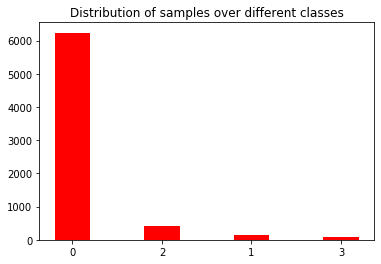

In [78]:
plt.bar(list(count.keys()),count.values(),color="r",width=.4,tick_label=["0","1","2","3"])
plt.title("Distribution of samples over different classes")


In [79]:
X,y = shuffle(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
X,y, test_size=0.25, random_state=42)    


In [80]:
len(y)

6870

# Baseline models

While training and buliding a model, we should keep in mind that there is never the best one. It is realtively experimental process. We start to try different trials. we tried different evaluation metrics

We have tried the following models:
- Multinomial Naïve Bayes
- XGBoosts classifier
- Random Forest
- Support Vector Machine
-  SGD Classifier


In [81]:
def train_predict(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    return y_pred

In [82]:
def cross_validation_accuracy(clf,X,y):
    scores = cross_val_score(clf, X, y, cv=3)
    print(scores)
    print('Accuracy of : {:.3f} ± {:.3f}'.format(np.mean(scores), 2 * np.std(scores)))

In [83]:
def Color_Confusion_Matrix(y, y_test, y_pred):
    cm=confusion_matrix(y_test, y_pred)
    l=len(set(y))
    df_cm = pd.DataFrame(cm, range(l), range(l))
    sns.set(font_scale=1)
    sns.heatmap(df_cm,cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')
    plt.ylabel('True label');
    plt.xlabel('Predicted label');
    plt.title("Confusion Matrix", size = 16)
    plt.savefig('CM_Test_01.png')

In [84]:
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score 
def plot_roc_curve(fpr, tpr,auc):  
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve with AUC {:.3f}'.format(AUC))
    plt.legend()
    plt.show()

# Models as trails for Classifcation

In [85]:
## 01-Naive Bayes
trial_01=Pipeline([ ('vectorizer', TfidfVectorizer()), ('classifier', MultinomialNB())])
################################################################################


## 02-XGBClassifier
trial_02 = Pipeline([('vect', CountVectorizer(stop_words='english')),
                     ('clf', xgb.XGBClassifier())])
################################################################################
## 03-Random Forest Classifier
trial_03= Pipeline([('vect', CountVectorizer(stop_words='english')),
                     ('clf', RandomForestClassifier(n_estimators=1000, random_state=0))])

################################################################################
## 04-SVC Classifier
vec = TfidfVectorizer(min_df=3,ngram_range=(1, 2))
svd = TruncatedSVD()
pipe = make_pipeline(vec, svd)
clf = SVC()
trial_04 = make_pipeline(pipe, clf)

#################################################################################
# 05- SGD Classifier
vec=TfidfVectorizer(stop_words='english')
clf= SGDClassifier(loss="log")
trial_05=Pipeline([("vect",vec),("clf",clf)])

#################################################################################



In this notebooks, We have found the following models as baseline models:
- 1) SGD Classifier
- 2) XG Boost

# 1) Training and Prediction by SGDClassifier

In [86]:
y_pred=train_predict(trial_05,X_train,y_train,X_test,y_test)

## Evaluation

## a) train-test-split

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1559
           1       0.98      0.63      0.77        93
           2       1.00      0.17      0.29        48
           3       1.00      0.11      0.20        18

    accuracy                           0.95      1718
   macro avg       0.98      0.48      0.56      1718
weighted avg       0.95      0.95      0.93      1718



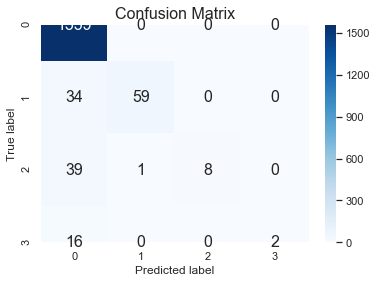

In [87]:
cr=classification_report(y_test,y_pred)
print(cr)
Color_Confusion_Matrix(y=y,y_test=y_test,y_pred=y_pred)

## b) 10 fold cross valdiation

In [88]:
cross_validation_accuracy(trial_05,X,y)

[0.95242252 0.95327511 0.95019659]
Accuracy of : 0.952 ± 0.003


              precision    recall  f1-score   support

           0       0.95      1.00      0.98      6237
           1       0.98      0.65      0.79       405
           2       1.00      0.27      0.43       151
           3       1.00      0.16      0.27        77

    accuracy                           0.95      6870
   macro avg       0.98      0.52      0.61      6870
weighted avg       0.96      0.95      0.94      6870



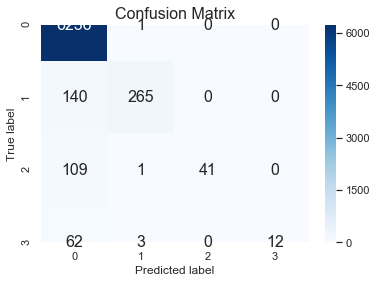

In [89]:
y_pred = cross_val_predict(trial_05, X, y, cv=10)
cr=classification_report(y,y_pred)
print(cr)
cm = confusion_matrix(y_pred,y)
Color_Confusion_Matrix(y=y,y_test=y,y_pred=y_pred)

As you see the results are improved by parameter tuning

## 1-a) Parameter Tuning on SGDClassifier

In [90]:
param_grid_01= {
    'clf__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e-1, 1e2, 1e3], # learning rate
    'clf__max_iter': [1000], # number of epochs
    'clf__penalty': ['l2'],
    'clf__loss': ['hinge','log'],
    'clf__n_jobs': [-1],
     'clf__tol': [1e-4, 1e-3, 1e-2]
}
trial_05_01 = GridSearchCV(trial_05, param_grid=param_grid_01, cv=5, n_jobs=-1, verbose=2)

In [91]:
trial_05_01.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   12.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                          

## Result of grid search over different parameters

In [92]:
results =pd.DataFrame(trial_05_01.cv_results_)
results = results.sort_values(by='mean_test_score', ascending=False)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__alpha,param_clf__loss,param_clf__max_iter,param_clf__n_jobs,param_clf__penalty,param_clf__tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.305583,0.006512,0.035306,0.002863,0.0001,hinge,1000,-1,l2,0.0001,"{'clf__alpha': 0.0001, 'clf__loss': 'hinge', 'clf__max_iter': 1000, 'clf__n_jobs': -1, 'clf__penalty': 'l2', 'clf__tol': 0.0001}",0.997093,0.995155,0.993210,0.996113,0.992218,0.994759,0.001805,1
1,0.278057,0.012964,0.040891,0.002676,0.0001,hinge,1000,-1,l2,0.001,"{'clf__alpha': 0.0001, 'clf__loss': 'hinge', 'clf__max_iter': 1000, 'clf__n_jobs': -1, 'clf__penalty': 'l2', 'clf__tol': 0.001}",0.997093,0.994186,0.993210,0.995141,0.991245,0.994177,0.001947,2
2,0.278056,0.003959,0.038696,0.004652,0.0001,hinge,1000,-1,l2,0.01,"{'clf__alpha': 0.0001, 'clf__loss': 'hinge', 'clf__max_iter': 1000, 'clf__n_jobs': -1, 'clf__penalty': 'l2', 'clf__tol': 0.01}",0.996124,0.994186,0.990301,0.994169,0.994163,0.993789,0.001901,3
4,0.303389,0.014209,0.033311,0.004260,0.0001,log,1000,-1,l2,0.001,"{'clf__alpha': 0.0001, 'clf__loss': 'log', 'clf__max_iter': 1000, 'clf__n_jobs': -1, 'clf__penalty': 'l2', 'clf__tol': 0.001}",0.952519,0.961240,0.945684,0.957240,0.949416,0.953222,0.005519,4
5,0.263496,0.007394,0.037499,0.003816,0.0001,log,1000,-1,l2,0.01,"{'clf__alpha': 0.0001, 'clf__loss': 'log', 'clf__max_iter': 1000, 'clf__n_jobs': -1, 'clf__penalty': 'l2', 'clf__tol': 0.01}",0.952519,0.960271,0.946654,0.957240,0.949416,0.953222,0.004980,4


## Using Best estimator to improve the model

In [93]:
clf_05_01=trial_05_01.best_estimator_

In [94]:
y_pred=clf_05_01.predict(X_test)

## Evaluation after parameter tuning

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1559
           1       0.99      0.98      0.98        93
           2       1.00      0.96      0.98        48
           3       1.00      1.00      1.00        18

    accuracy                           1.00      1718
   macro avg       1.00      0.98      0.99      1718
weighted avg       1.00      1.00      1.00      1718



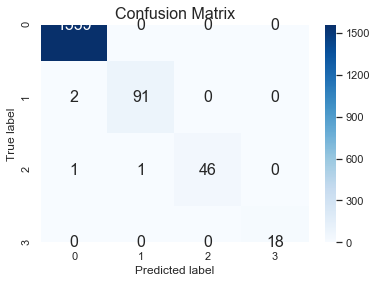

In [95]:
cr=classification_report(y_test,y_pred)
print(cr)
Color_Confusion_Matrix(y=y,y_test=y_test,y_pred=y_pred)

In [96]:
cross_validation_accuracy(clf_05_01,X,y)

[0.99650808 0.99563319 0.99475754]
Accuracy of : 0.996 ± 0.001


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6237
           1       0.99      0.98      0.99       405
           2       1.00      0.94      0.97       151
           3       1.00      0.96      0.98        77

    accuracy                           1.00      6870
   macro avg       1.00      0.97      0.98      6870
weighted avg       1.00      1.00      1.00      6870



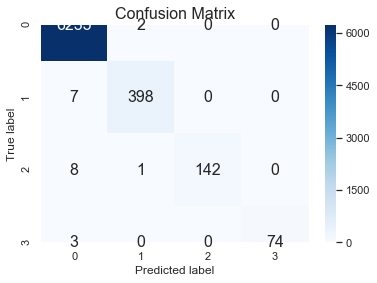

In [97]:
y_pred = cross_val_predict(clf_05_01, X, y, cv=5)
cr=classification_report(y,y_pred)
print(cr)
cm = confusion_matrix(y_pred,y)
Color_Confusion_Matrix(y=y,y_test=y,y_pred=y_pred)

As you see the result is improved by parameter tuning

# 2) Training and Prediction by XGboost

In [98]:
y_pred=train_predict(trial_02,X_train,y_train,X_test,y_test)

## Evaluation

## a) train-test-split

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1559
           1       0.99      1.00      0.99        93
           2       1.00      0.98      0.99        48
           3       1.00      1.00      1.00        18

    accuracy                           1.00      1718
   macro avg       1.00      0.99      1.00      1718
weighted avg       1.00      1.00      1.00      1718



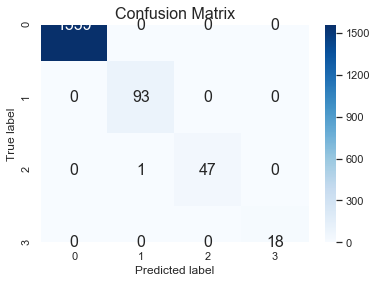

In [99]:
cr=classification_report(y_test,y_pred)
print(cr)
Color_Confusion_Matrix(y=y,y_test=y_test,y_pred=y_pred)

## b) 10 fold cross valdiation

In [100]:
cross_validation_accuracy(trial_02,X,y)

[0.99825404 0.99912664 1.        ]
Accuracy of : 0.999 ± 0.001


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6237
           1       0.99      0.99      0.99       405
           2       1.00      0.99      1.00       151
           3       1.00      1.00      1.00        77

    accuracy                           1.00      6870
   macro avg       1.00      1.00      1.00      6870
weighted avg       1.00      1.00      1.00      6870



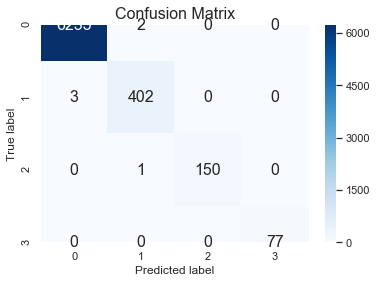

In [101]:
y_pred = cross_val_predict(trial_02, X, y, cv=10)
cr=classification_report(y,y_pred)
print(cr)
cm = confusion_matrix(y_pred,y)
Color_Confusion_Matrix(y=y,y_test=y,y_pred=y_pred)

In [102]:
y_pred=train_predict(trial_02,X_train,y_train,X_test,y_test)

## Parameter Tuning on XGB Classifier

In [103]:
param_grid_02= {
    'clf__C': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0],
    'clf__penalty': ['l2'],
    'clf__n_jobs': [-1]
}
trial_02_01 = GridSearchCV(trial_02, param_grid=param_grid_02, cv=3, n_jobs=-1, verbose=2,scoring='f1_weighted')

In [104]:
trial_02_01.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  24 | elapsed:   19.9s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   20.2s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                            

## Result of grid search over different parameters

In [105]:
results =pd.DataFrame(trial_02_01.cv_results_)
results = results.sort_values(by='mean_test_score', ascending=False)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_clf__n_jobs,param_clf__penalty,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,6.113989,0.206498,0.101063,0.000941,1e-07,-1,l2,"{'clf__C': 1e-07, 'clf__n_jobs': -1, 'clf__penalty': 'l2'}",0.998831,0.99884,0.998829,0.998834,0.000005,1
1,6.105678,0.183359,0.101396,0.004631,1e-06,-1,l2,"{'clf__C': 1e-06, 'clf__n_jobs': -1, 'clf__penalty': 'l2'}",0.998831,0.99884,0.998829,0.998834,0.000005,1
2,6.018911,0.491446,0.096409,0.000470,1e-05,-1,l2,"{'clf__C': 1e-05, 'clf__n_jobs': -1, 'clf__penalty': 'l2'}",0.998831,0.99884,0.998829,0.998834,0.000005,1
3,5.917183,0.304153,0.099401,0.003292,0.0001,-1,l2,"{'clf__C': 0.0001, 'clf__n_jobs': -1, 'clf__penalty': 'l2'}",0.998831,0.99884,0.998829,0.998834,0.000005,1
4,5.883606,0.308673,0.095744,0.002444,0.001,-1,l2,"{'clf__C': 0.001, 'clf__n_jobs': -1, 'clf__penalty': 'l2'}",0.998831,0.99884,0.998829,0.998834,0.000005,1


## Using Best estimator to improve the model

In [106]:
clf_02_01=trial_02_01.best_estimator_

In [107]:
y_pred=clf_02_01.predict(X_test)

## Evaluation after parameter tuning

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1559
           1       0.99      1.00      0.99        93
           2       1.00      0.98      0.99        48
           3       1.00      1.00      1.00        18

    accuracy                           1.00      1718
   macro avg       1.00      0.99      1.00      1718
weighted avg       1.00      1.00      1.00      1718



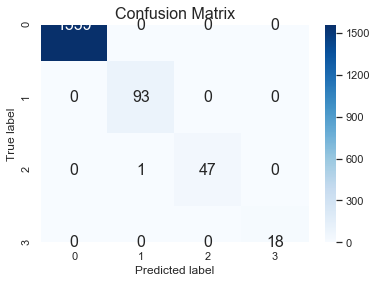

In [108]:
cr=classification_report(y_test,y_pred)
print(cr)
Color_Confusion_Matrix(y=y,y_test=y_test,y_pred=y_pred)

In [109]:
cross_validation_accuracy(clf_02_01,X,y)

[0.99825404 0.99912664 1.        ]
Accuracy of : 0.999 ± 0.001


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6237
           1       0.99      0.99      0.99       405
           2       1.00      0.99      1.00       151
           3       1.00      1.00      1.00        77

    accuracy                           1.00      6870
   macro avg       1.00      1.00      1.00      6870
weighted avg       1.00      1.00      1.00      6870



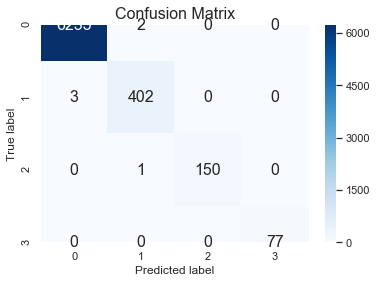

In [110]:
y_pred = cross_val_predict(clf_02_01, X, y, cv=3)
cr=classification_report(y,y_pred)
print(cr)
cm = confusion_matrix(y_pred,y)
Color_Confusion_Matrix(y=y,y_test=y,y_pred=y_pred)

We can also see here an improvment in our model's result after parameter tuning

# Explaining prediction by SGD classifier using eli5

In [111]:
from eli5 import show_weights
show_weights(trial_05, top=30)

ModuleNotFoundError: No module named 'eli5'

In [ ]:
index_0=list(np.where(y==0))
index_1=list(np.where(y==1))
index_2=list(np.where(y==2))
index_3=list(np.where(y==3))


In [ ]:
idx_0=index_0[0].tolist();
idx_1=index_1[0].tolist();
idx_2=index_2[0].tolist();
idx_3=index_3[0].tolist();

# Explanation of classification by eli5 over SGDclassifier

In [ ]:
import eli5
eli5.show_prediction(clf, X[idx_0[0]],vec=vec)

In [ ]:
eli5.show_prediction(clf, X[idx_1[1]],vec=vec)

In [ ]:
eli5.show_prediction(clf, X[idx_2[120]],vec=vec)

In [ ]:
eli5.show_prediction(clf, X[idx_3[20]],vec=vec)